# Kaggle House Price Prediction Project: Young Min Cho + Alexander Sigman

### Machine Learning Project (NYCDSA)
- **Team:** Pump Up the Bayes

# 0. SET UP

In [104]:
# Initializing

# data processing. pandas as alias pd
import pandas as pd 
# linear algebra. numpy as alias np
import numpy as np 

# If you're working with a notebook, don't forget to use Matplotlib magic! 
%matplotlib inline

# matlab-style plotting
import matplotlib.pyplot as plt 
## ggplot
plt.style.use('ggplot')
import seaborn as sns
color = sns.color_palette()
# Set the Seaborn theme if desired
sns.set_style("darkgrid")

# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

#for some statistics
from scipy import stats
from scipy.stats import norm, skew  #ex. sns(fit = norm)


# Format scientific notation from pandas aggregation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [284]:
#Image Saving Function
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=250):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# ignore future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [285]:
# import csv to train and test datasets in pandas dataframe
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv("./data/test.csv") 

In [287]:
test_Id = test_df.Id

# 1. Simple EDA on Train Dataset

In [288]:
train_df.sample(5)
# train_df.describe()
# train_df.dtypes
# train_df.info()
# train_df.Alley 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
882,883,60,RL,nan,9636,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1992,1993,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,808,808,GasA,Gd,Y,SBrkr,808,785,0,1593,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1993.000,RFn,2,389,TA,TA,Y,342,40,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,178000
757,758,60,RL,nan,11616,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,5,1978,1978,Hip,CompShg,HdBoard,HdBoard,BrkCmn,328.000,TA,TA,CBlock,TA,TA,Mn,Rec,438,Unf,0,234,672,GasA,TA,Y,SBrkr,672,714,0,1386,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1978.000,Fin,2,440,TA,TA,Y,335,0,0,0,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Abnorml,158900
1155,1156,20,RL,90.000,10768,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,1Story,5,8,1976,2004,Gable,CompShg,Plywood,Plywood,None,0.000,Gd,Gd,CBlock,Gd,TA,Gd,ALQ,1157,Unf,0,280,1437,GasA,TA,Y,SBrkr,1437,0,0,1437,1,0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1976.000,RFn,2,528,TA,TA,Y,0,21,0,0,180,0,NaN,NaN,NaN,0,7,2007,WD,Normal,218000
1293,1294,60,RL,78.000,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,194,Unf,0,638,832,GasA,TA,Y,SBrkr,832,832,0,1664,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1976.000,RFn,2,528,TA,TA,Y,0,28,0,0,259,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900
735,736,75,RM,60.000,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,7,1914,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,BrkTil,Gd,TA,Mn,Rec,390,Unf,0,490,880,GasW,Fa,N,SBrkr,880,888,0,1768,0,0,1,1,2,1,TA,6,Typ,2,TA,Detchd,1914.000,Unf,2,320,TA,TA,N,0,341,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,163000


### 1.1 Dropping ID column

In [289]:
# Dropping ID COLUMN --------------------------------------------------------------------------------------------------

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_df.shape))
print("The test data size before dropping Id feature is : {} ".format(test_df.shape))

#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
print("\n ----------ID column dropped both for train & test----------")
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

 ----------ID column dropped both for train & test----------

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## 1.2 Removing Outliers: using Simple Linear Regression

Our Feature Engineered Variable, "HouseSF" has very high correlation to our target variable. <br>
Therefore, we have removed the top 12 outliers

In [520]:
temp = train_df.copy()
temp['HouseSF'] = temp['TotalBsmtSF'] + temp['GrLivArea'] + temp['GarageArea'] 

Saving figure HouseSF_Outliers


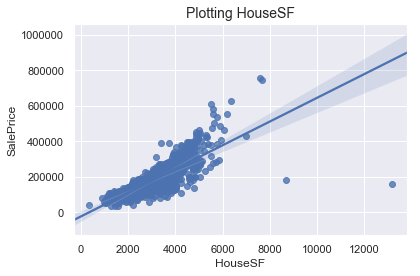

In [291]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=temp['HouseSF'], y=temp['SalePrice'])
ax.set_title('Plotting HouseSF',fontsize=14)
save_fig('HouseSF_Outliers')  


In [292]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(temp[['HouseSF']], temp['SalePrice'])
rss = (temp['SalePrice']-ols.predict(temp[['HouseSF']]))

In [293]:
rss.sort_values(ascending=False).head(10).index # [691, 898, 1182, 803, 1169, 1046, 688, 769, 1181, 440]
temp.index[temp['HouseSF']>8000].tolist() # [523, 1298]
train_df = train_df.drop(train_df.index[[523, 1298, 691, 898, 1182, 803, 1169, 1046, 688, 769, 1181, 440]])

**Output Result**

Saving figure HouseSF_Outliers_Removed


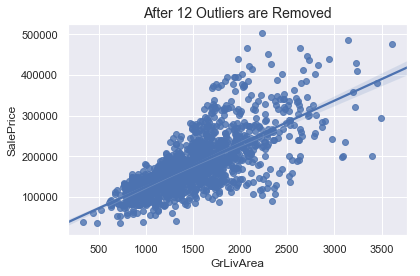

In [294]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
ax.set_title('After 12 Outliers are Removed',fontsize=14)
save_fig('HouseSF_Outliers_Removed')  

## 1.4 Combining Train and Test

In [295]:
rntest

1459

In [296]:
### COMBINING TRAIN AND TEST

# a) get row numbers for both
rntrain = train_df.shape[0]
rntest = test_df.shape[0]
# b) store Y
y_train = train_df.SalePrice.values
#c) concat train & test
all_data = pd.concat((train_df,test_df)).reset_index(drop=True) #make sure to reset index, because they will be overlapped
#d) drop target value
all_data.drop(['SalePrice'], axis=1, inplace=True)  # axis=1 & inplace=True; to make it have impact

print("Size of all_data : {} rows and {} columns".format(all_data.shape[0], all_data.shape[1]))  

Size of all_data : 2907 rows and 79 columns


**The Kernel need to be restarted if above block is ran**

In [297]:
# for i, col in enumerate(float_col):
#     plt.figure(i)
#     sns.regplot(x=col, y='SalePrice', data=train_df)
#     plt.show()

----------------------------------------------------------------------------------

## 1.5 Analyze Target Variable

SalePrice(raw) 		 : mu = 178208.93 and sigma = 72001.87
Saving figure SalePriceRaw


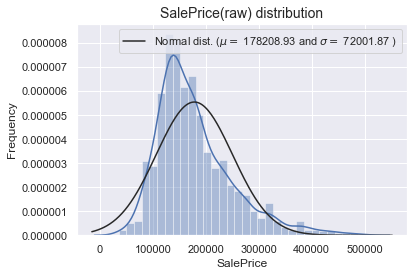

In [13]:
# get mu and sigma
mu, sigma = norm.fit(train_df['SalePrice'])
print( 'SalePrice(raw) \t\t : mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
# Distribution Plot of Target Variable
sns.distplot(train_df['SalePrice'] , fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice(raw) distribution', fontsize = 14)
save_fig('SalePriceRaw')  

plt.show()

Saving figure SalePriceRaw_prob


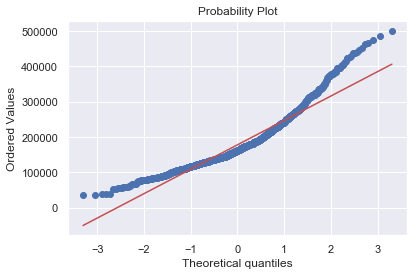

In [14]:
# Probability Plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
save_fig('SalePriceRaw_prob') 

plt.show()


>With this information we can see that the prices are **skewed right** and some outliers lies over 400,000. Lets apply a **log** on the independent variable (SalePrice) for machine learning.

In [15]:
# Making a dataframe containing both rawSalePrice and logSalePrice

raw_sp = train_df['SalePrice']
log_sp = train_df['SalePrice'].apply(np.log) # the logarithm with base e

SP = pd.concat([raw_sp, log_sp], axis=1, keys=['SalePrice', 'SalePrice(log)'])
SP.describe()

,SalePrice,SalePrice(log)
count,1448.000,1448.000
mean,178208.926,12.016
std,72026.747,0.388
min,34900.000,10.460
25%,129900.000,11.775
50%,162250.000,11.997
75%,213000.000,12.269
max,501837.000,13.126


SalePrice(log-normal) 	 : mu = 12.02 and sigma = 0.39
Saving figure SalePriceLog


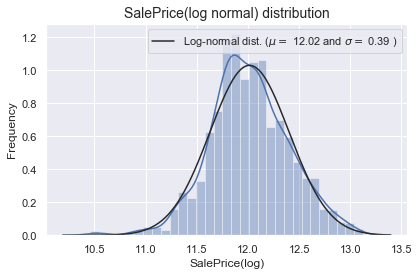

In [16]:
mu2, sigma2 = norm.fit(SP['SalePrice(log)'])
print( 'SalePrice(log-normal) \t : mu = {:.2f} and sigma = {:.2f}'.format(mu2, sigma2))
sns.distplot(SP['SalePrice(log)'] , fit=norm); # the logarithm with base e

#sns.distplot(np.log1p(SP['SalePrice']) , fit=norm);
plt.legend(['Log-normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu2, sigma2)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice(log normal) distribution', fontsize=14)
save_fig('SalePriceLog') 
plt.show()

Saving figure SalePriceLog_prob


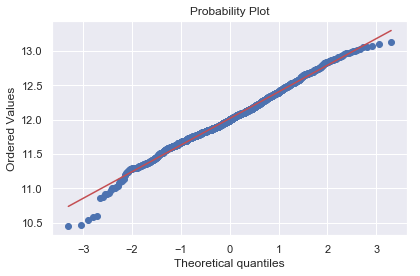

In [17]:
fig = plt.figure()
res = stats.probplot(SP['SalePrice(log)'], plot=plt)
save_fig('SalePriceLog_prob') 

plt.show()

## 1.6 Finding Data Type of Each Features

In [298]:
import re
with open('./data/DataDocumentation.txt', 'r',encoding='cp1252') as file:
    lines = file.readlines()
    
nominal = []
ordinal = []
continuous = []
discrete = []
for line in lines:
    if re.findall('(Nominal)', line):
        nominal.append(re.sub(' ', '', re.split('\(Nominal\)', line)[0].strip()))
    elif re.findall('(Ordinal)', line):
        ordinal.append(re.sub(' ', '', re.split('\(Ordinal\)', line)[0].strip()))
    elif re.findall('(Continuous)', line):
        continuous.append(re.sub(' ', '', re.split('\(Continuous\)', line)[0].strip()))
    elif re.findall('(Discrete)', line):
        discrete.append(re.sub(' ', '', re.split('\(Discrete\)', line)[0].strip()))
nominal = np.array(nominal)
nominal = np.delete(nominal, [0]) # Drop ID
nominal[13] = 'Exterior1st'       # Update Exterior1 to Exterior1st
nominal[14] = 'Exterior2nd'
ordinal = np.array(ordinal)
continuous = np.array(continuous)
continuous[15] = '3SsnPorch'
discrete = np.array(discrete)
discrete[2] = 'YearRemodAdd'
discrete[7] = 'BedroomAbvGr'
discrete[8] = 'KitchenAbvGr'
discrete = np.delete(discrete, [0]) # Drop Order 

In [299]:
print('Ordinal:\n', ordinal)
print('-----------------------------------------------------------------')
print('Nominal:\n', nominal)
print('-----------------------------------------------------------------')
print('Discrete:\n', ordinal)
print('-----------------------------------------------------------------')
print('Continuous:\n', nominal)

Ordinal:
 ['LotShape' 'Utilities' 'LandSlope' 'OverallQual' 'OverallCond'
 'ExterQual' 'ExterCond' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'HeatingQC' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PavedDrive' 'PoolQC' 'Fence']
-----------------------------------------------------------------
Nominal:
 ['MSSubClass' 'MSZoning' 'Street' 'Alley' 'LandContour' 'LotConfig'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType'
 'Foundation' 'Heating' 'CentralAir' 'GarageType' 'MiscFeature' 'SaleType'
 'SaleCondition']
-----------------------------------------------------------------
Discrete:
 ['LotShape' 'Utilities' 'LandSlope' 'OverallQual' 'OverallCond'
 'ExterQual' 'ExterCond' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'HeatingQC' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageFinish' 'GarageQu

##### Nominal Categorical Variables

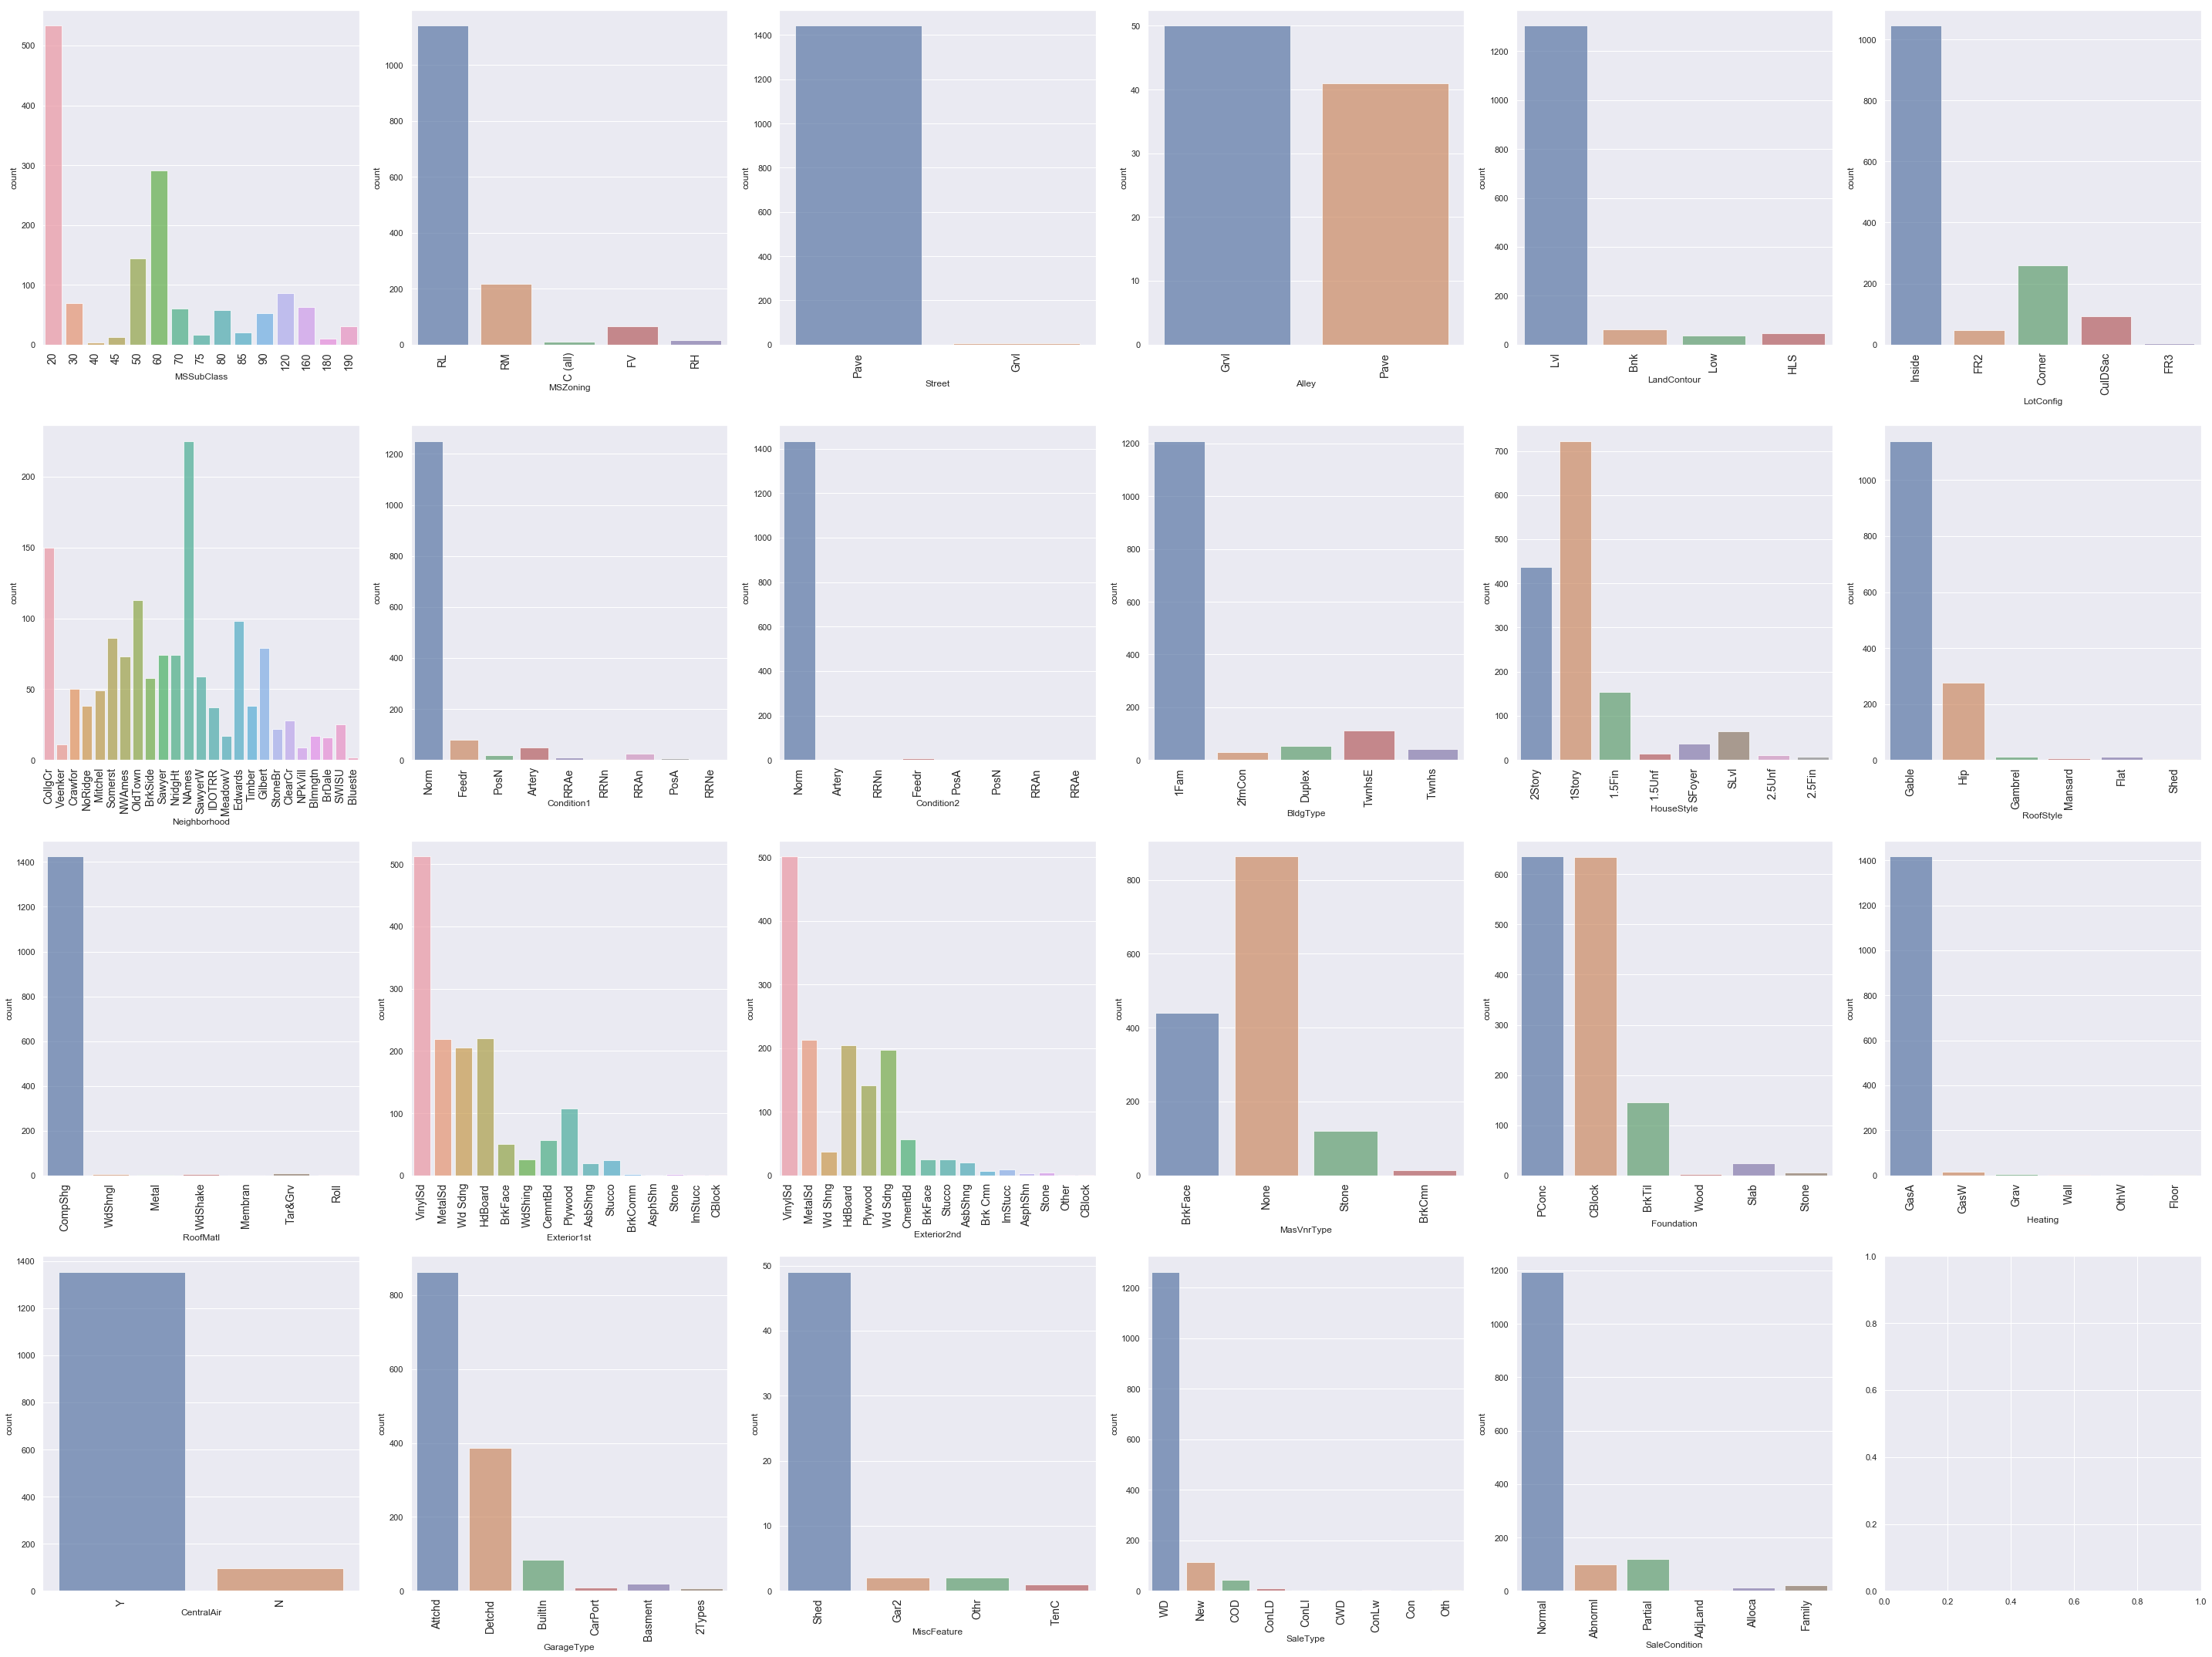

In [20]:
fig, axes = plt.subplots(round(len(train_df[nominal].columns) / 6), 6, figsize=(40, 30))
for i, ax in enumerate(fig.axes):
    if i < len(train_df[nominal].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=14)
        sns.countplot(x=train_df[nominal].columns[i], alpha=0.7, data=train_df[nominal], ax=ax)

fig.tight_layout()
fig.savefig('./images/nominal_cnt.png', bbox_inches='tight')  

# save_fig("nominal_countplot") #<- use this function if you want higher resolution
plt.show()

##### Ordinal Categorical Variables

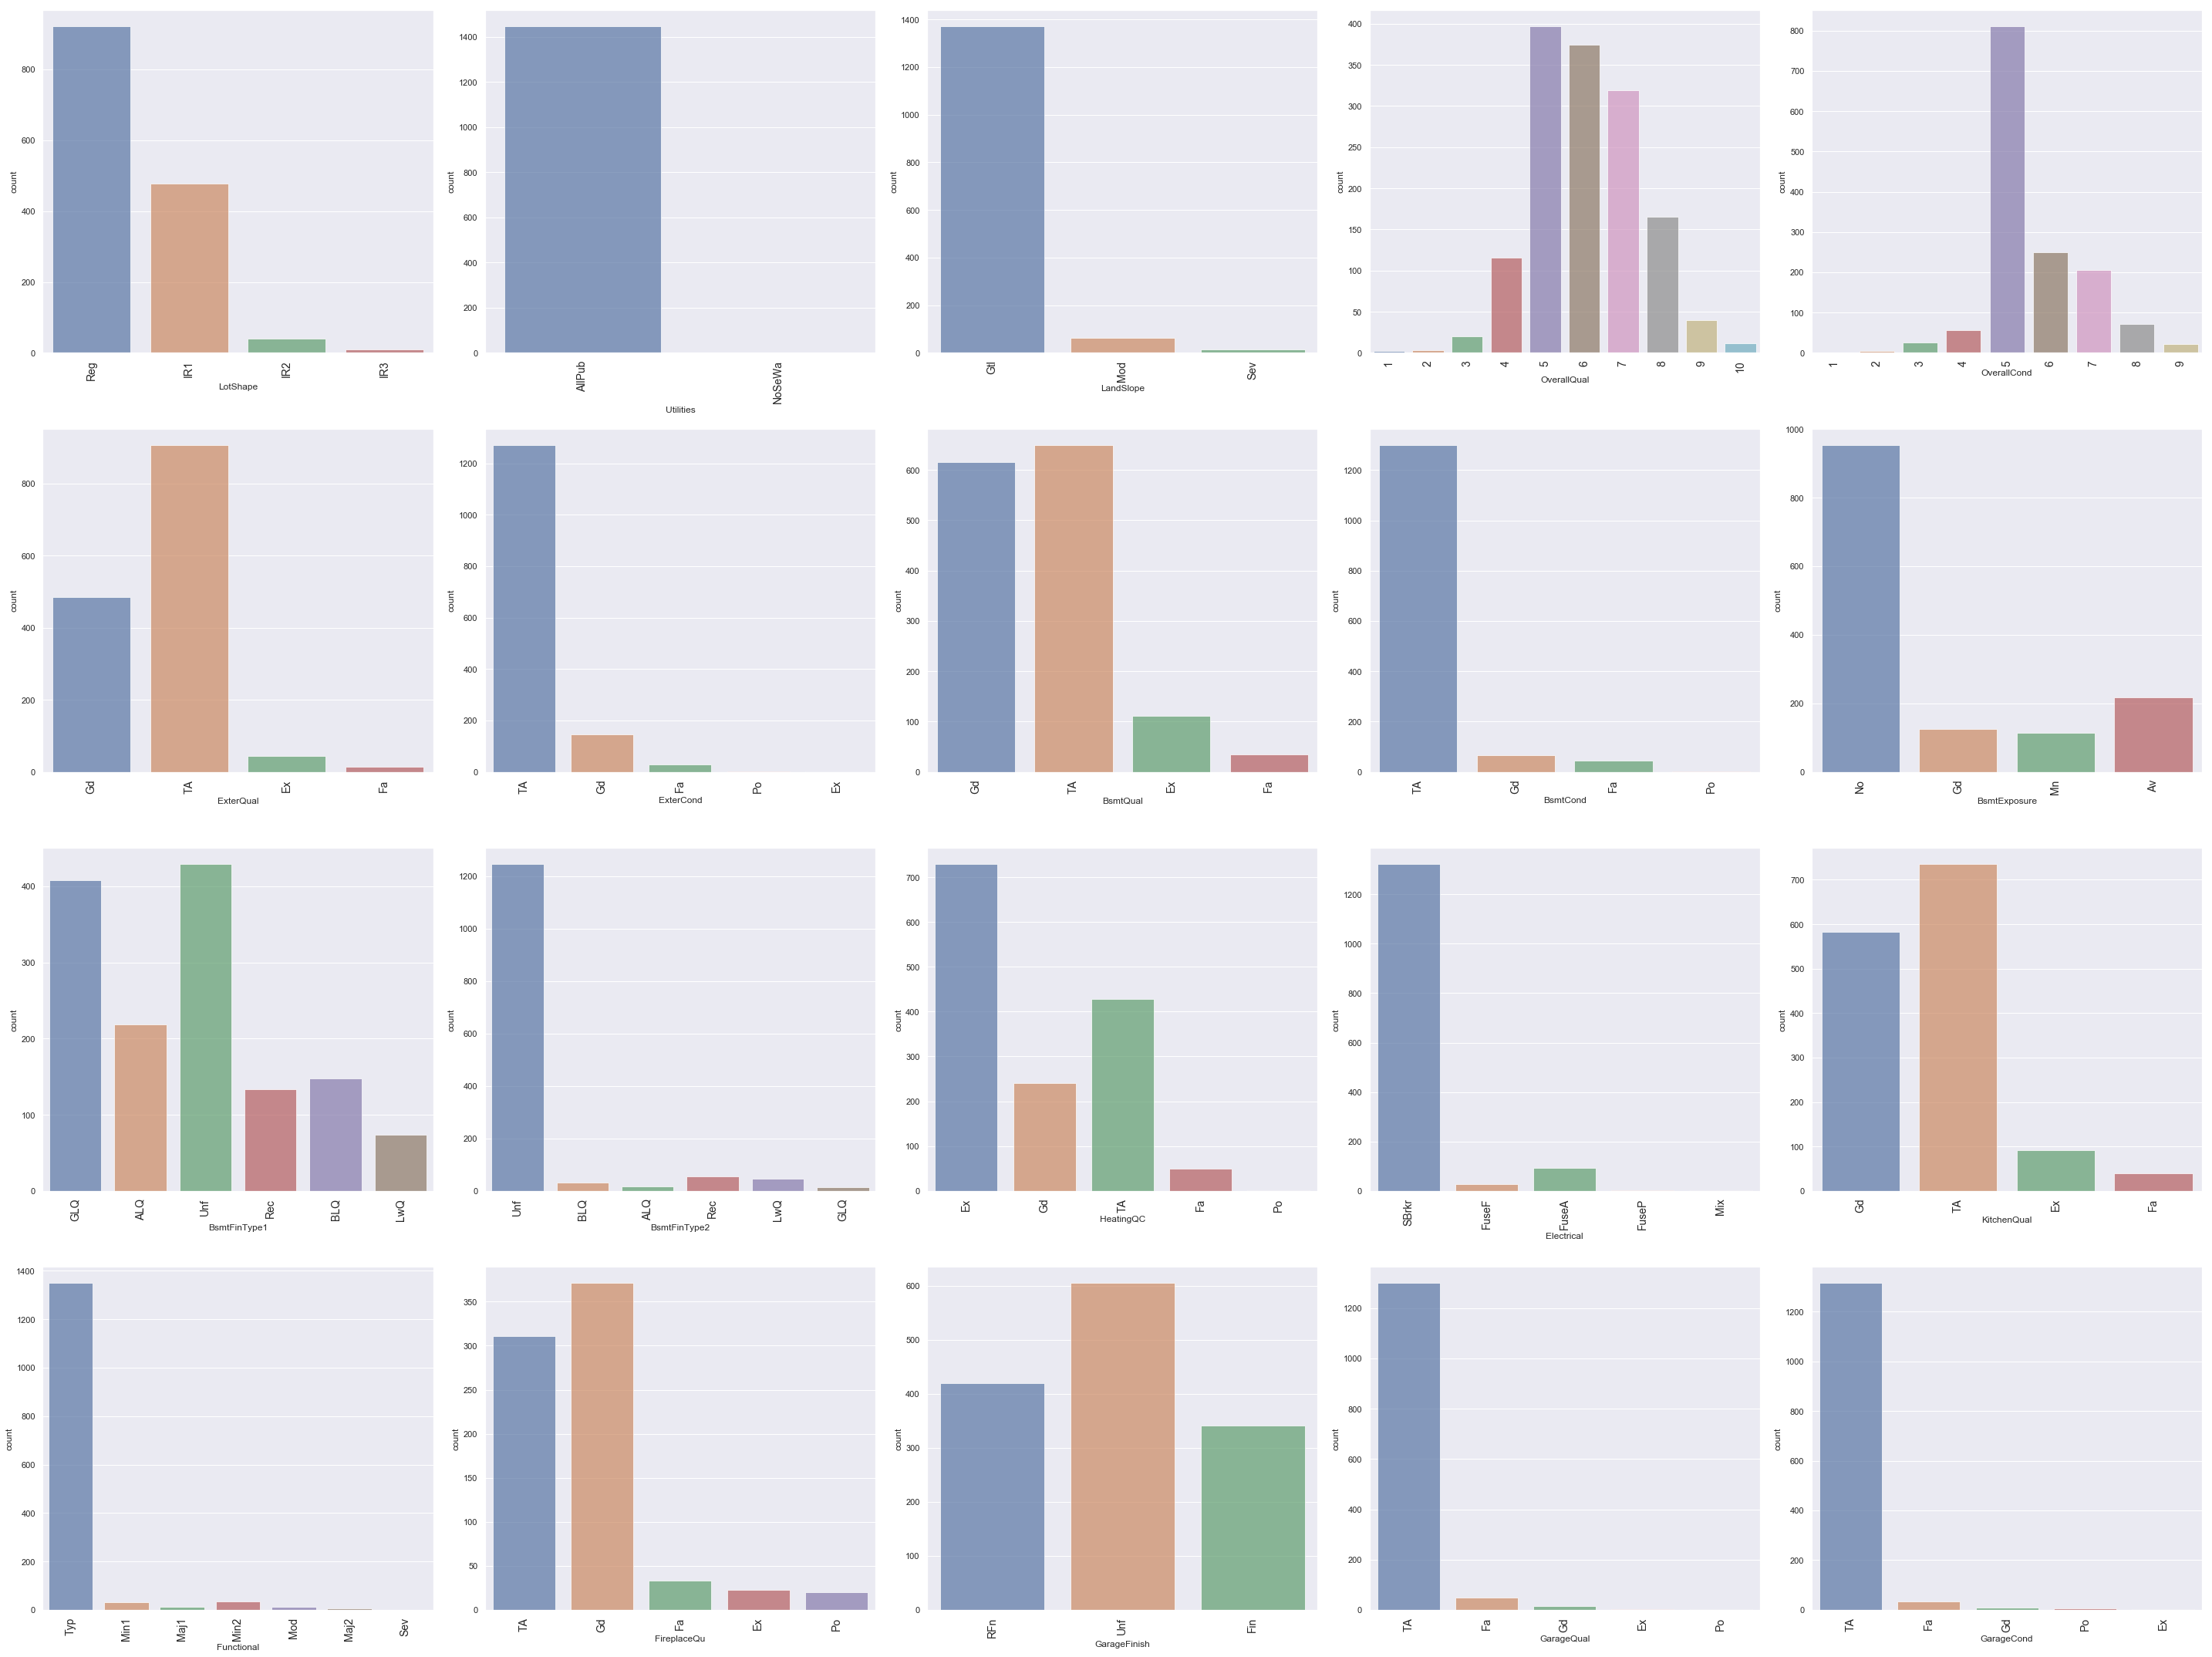

In [21]:
fig, axes = plt.subplots(round(len(train_df[ordinal].columns) / 6), 5, figsize=(40, 30))
for i, ax in enumerate(fig.axes):
    if i < len(train_df[ordinal].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=14)
        sns.countplot(x=train_df[ordinal].columns[i], alpha=0.7, data=train_df[ordinal], ax=ax)

fig.tight_layout()
fig.savefig('./images/ordinal_cnt.png', bbox_inches='tight')  

# save_fig("nominal_countplot") <- use this function if you want higher resolution
plt.show()

###### Discrete Variables

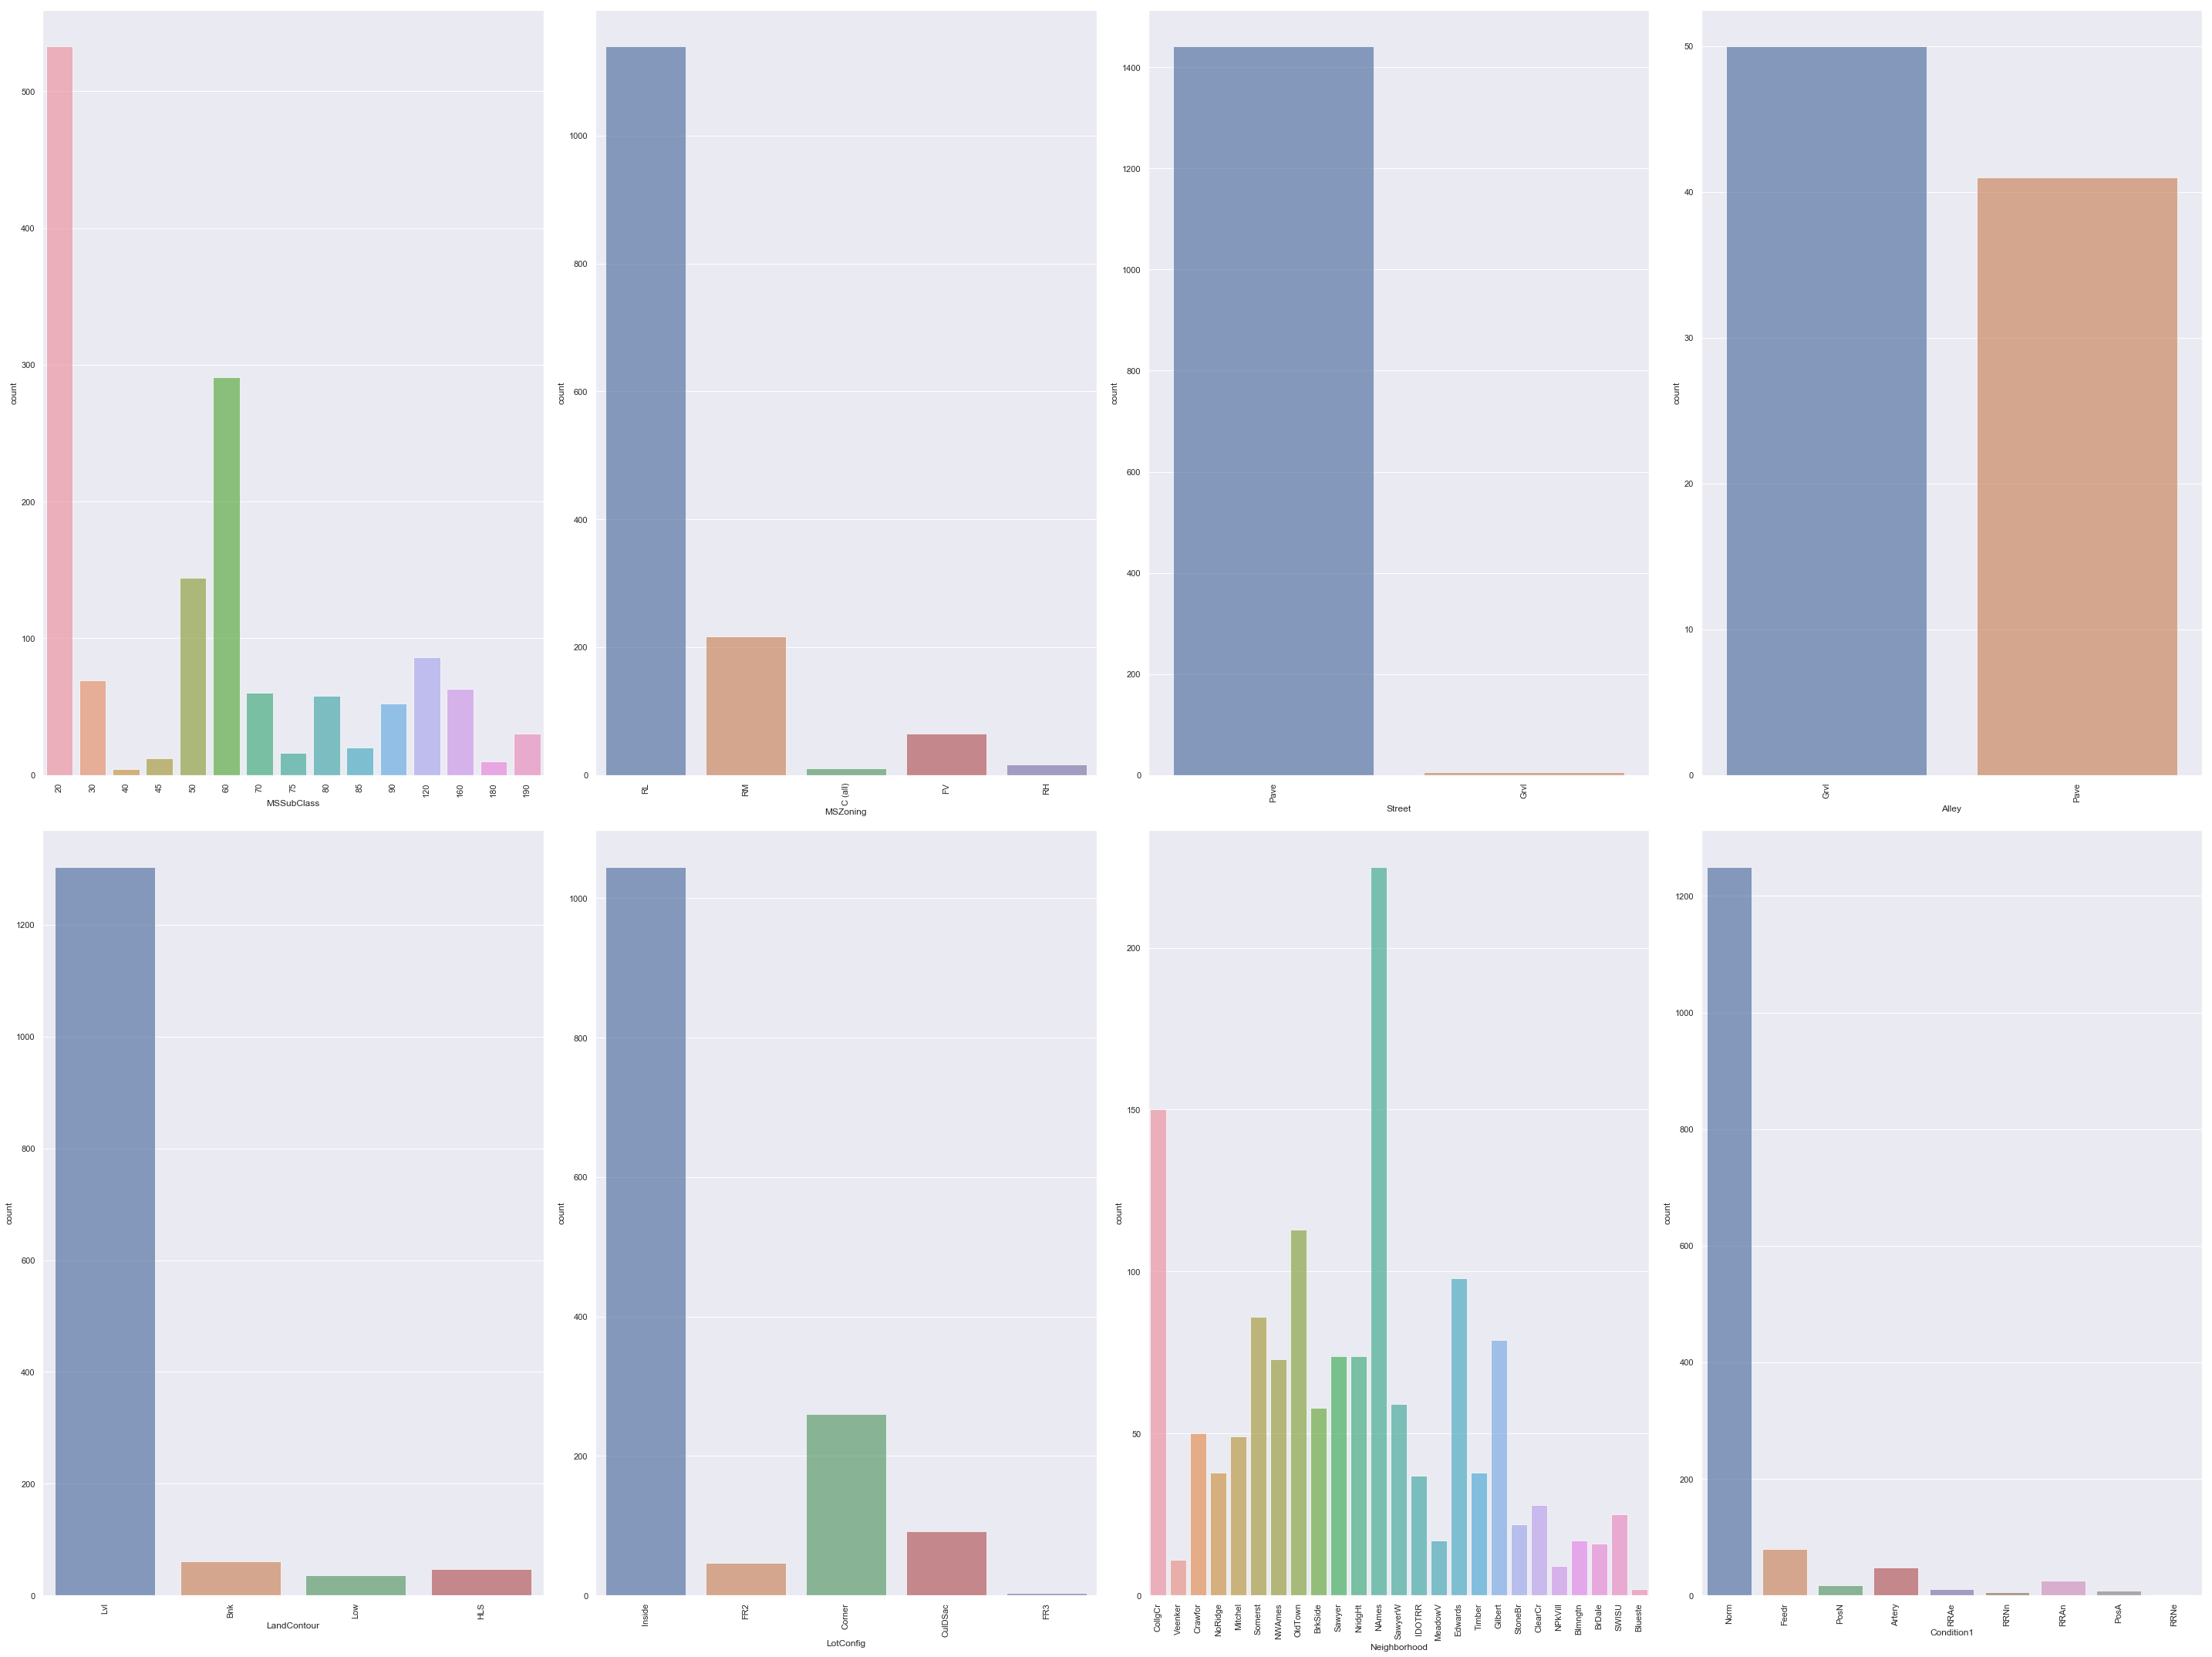

In [22]:
fig, axes = plt.subplots(round(len(train_df[discrete].columns) / 6), 4, figsize=(40, 30))
for i, ax in enumerate(fig.axes):
    if i < len(train_df[discrete].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=train_df[nominal].columns[i], alpha=0.7, data=train_df[nominal], ax=ax)

fig.tight_layout()

fig.savefig('./images/discrete_cnt.png', bbox_inches='tight')  
# save_fig("nominal_countplot") <- use this function if you want higher resolution
plt.show()

###### Continuous Features

Saving figure continuous0


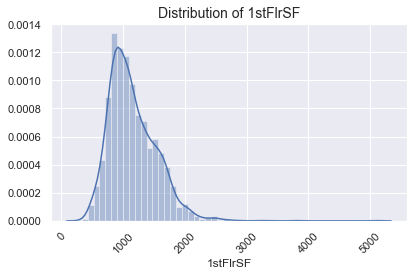

Saving figure continuous1


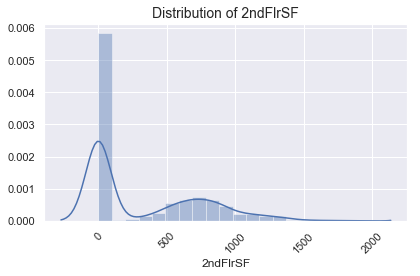

Saving figure continuous2


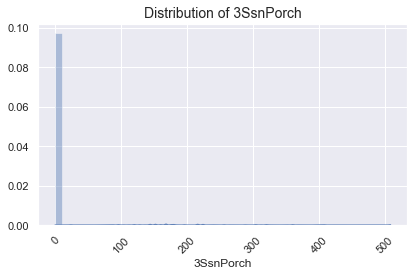

Saving figure continuous3


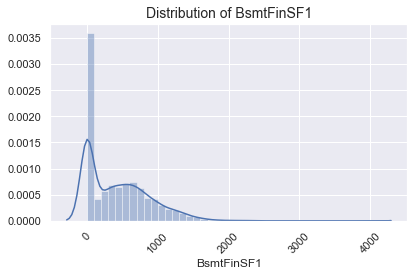

Saving figure continuous4


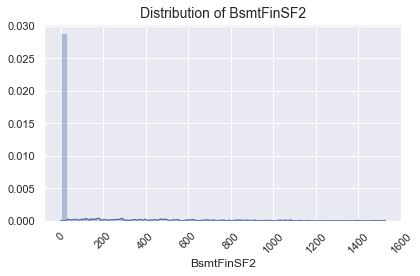

Saving figure continuous5


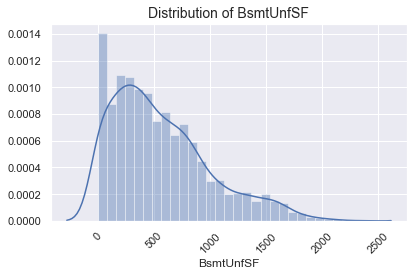

Saving figure continuous6


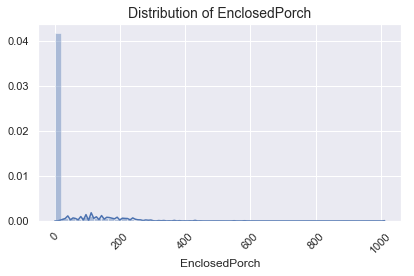

Saving figure continuous7


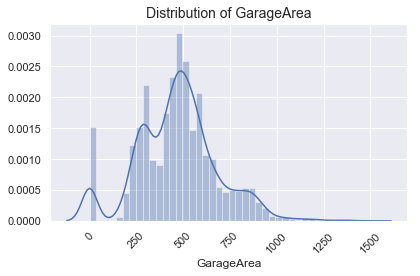

Saving figure continuous8


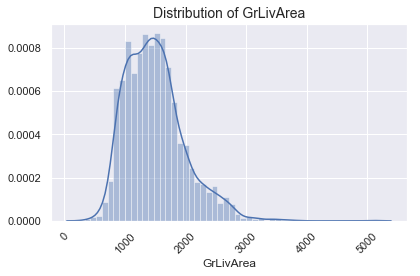

Saving figure continuous9


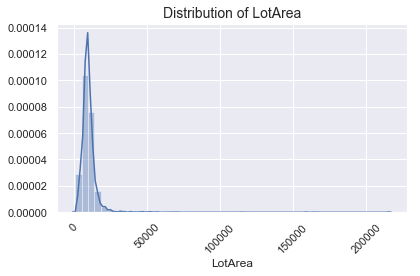

Saving figure continuous10


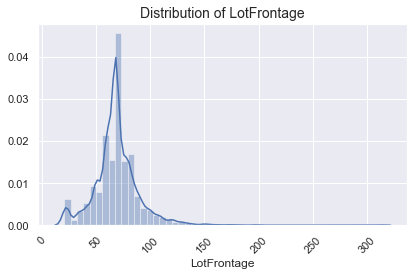

Saving figure continuous11


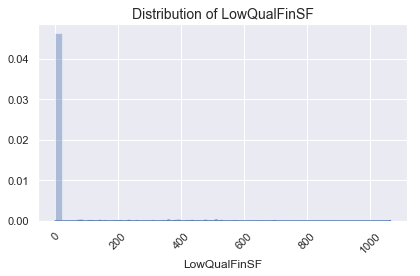

Saving figure continuous12


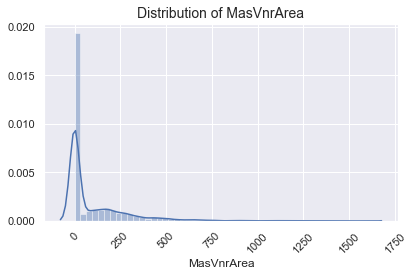

Saving figure continuous13


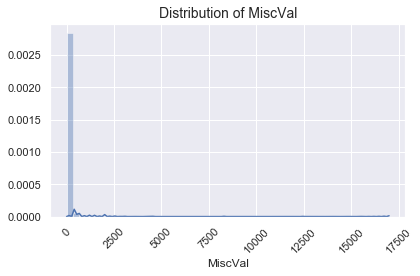

Saving figure continuous14


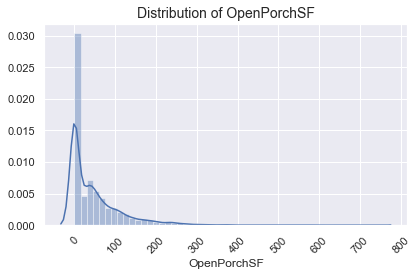

Saving figure continuous15


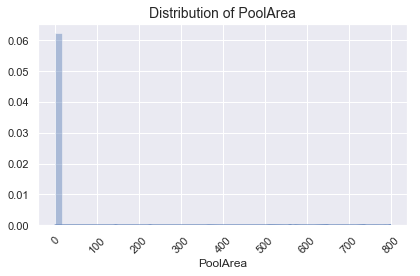

Saving figure continuous16


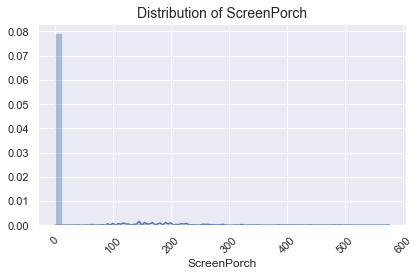

Saving figure continuous17


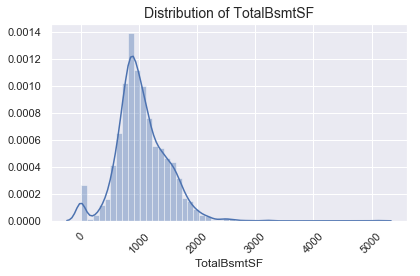

Saving figure continuous18


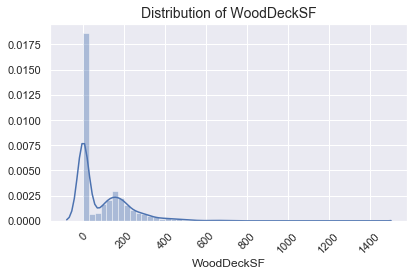

In [23]:
for i, col in enumerate(all_data[all_data[all_data.columns[all_data.columns.isin(continuous)]].columns].columns):
    all_data[col].fillna(all_data[col].median(),inplace=True)
    plt.figure(i)
    ax = sns.distplot(all_data[col])
    plt.xticks(rotation=45)
    plt.title('Distribution of {}'.format(col), fontsize = 14)
    save_fig("continuous{}".format(i))
    plt.show() 

***correlation(train_df) vs SalePrice***

In [24]:
# correlation matrix against the Target Variable: using train_DF
corr_matrix = train_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000
OverallQual      0.807
GrLivArea        0.718
GarageCars       0.658
GarageArea       0.646
TotalBsmtSF      0.638
1stFlrSF         0.619
FullBath         0.553
YearBuilt        0.543
YearRemodAdd     0.531
TotRmsAbvGrd     0.520
GarageYrBlt      0.506
Fireplaces       0.472
MasVnrArea       0.457
BsmtFinSF1       0.382
LotFrontage      0.358
OpenPorchSF      0.340
WoodDeckSF       0.328
2ndFlrSF         0.294
HalfBath         0.285
LotArea          0.260
BsmtFullBath     0.237
BsmtUnfSF        0.225
BedroomAbvGr     0.164
ScreenPorch      0.097
MoSold           0.069
3SsnPorch        0.043
PoolArea         0.037
BsmtFinSF2      -0.014
MiscVal         -0.020
LowQualFinSF    -0.024
YrSold          -0.033
BsmtHalfBath    -0.042
OverallCond     -0.074
MSSubClass      -0.090
EnclosedPorch   -0.129
KitchenAbvGr    -0.143
Name: SalePrice, dtype: float64

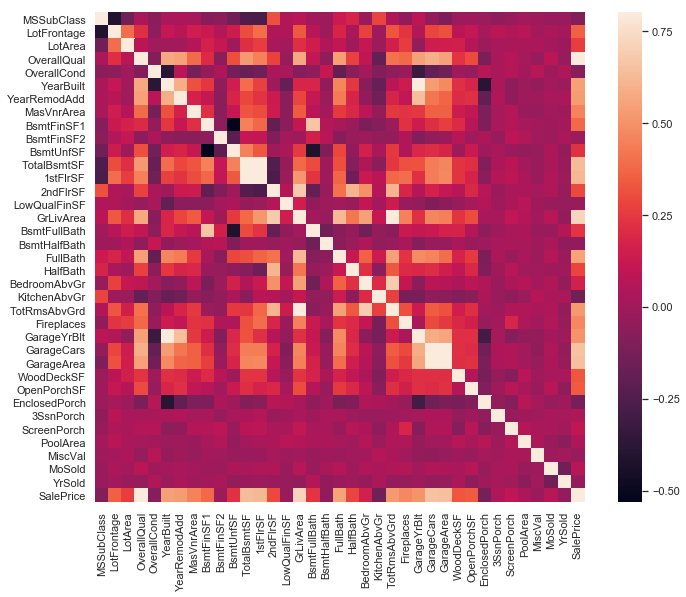

In [25]:
#Correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True) 

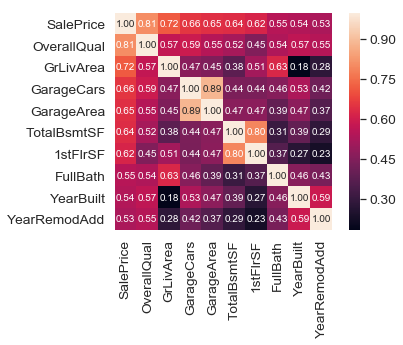

In [26]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

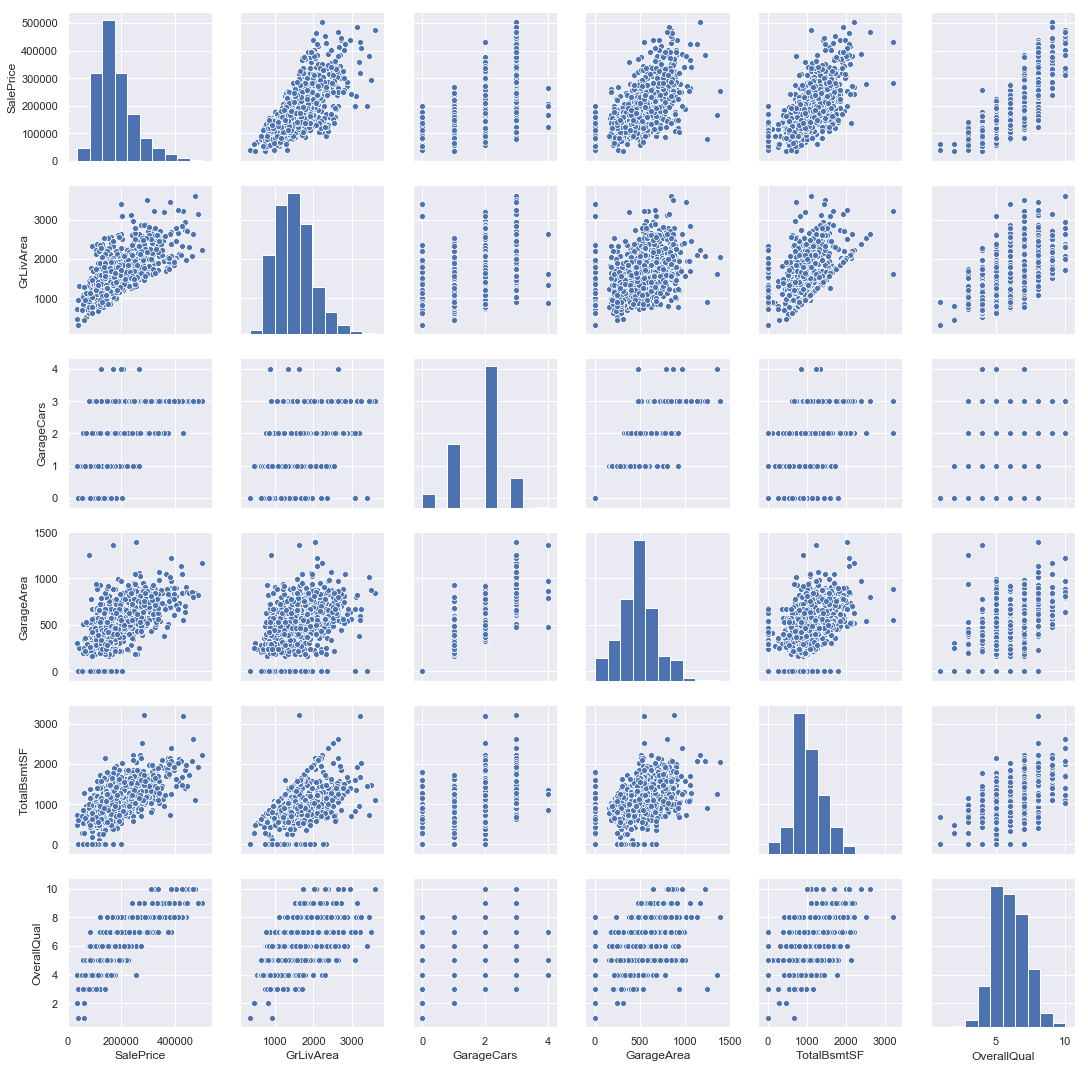

In [27]:
## EXAMPLE of a PAIR PLOT

sns.set()
cols = ['SalePrice',  'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', 'OverallQual']
sns.pairplot(train_df[cols], size = 2.5)
plt.show()

### Imputing values: 

In [300]:
# IMPUTATION BY MEDIAN



# continuous

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


# IMPUTATION BY 0 
# Both of these features have identical missing values. Also missing values on other Bsmt. Safely fill them with 0s
for col in ["BsmtFullBath",'BsmtHalfBath']:
    all_data[col].fillna(0, inplace = True)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


    
    
#IMPUTATION BY NONE

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")




# IMPUTATION BY MODE
all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0], inplace = True)
all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0], inplace = True)
# Nominal
all_data["Neighborhood"].fillna(all_data["Neighborhood"].mode()[0], inplace=True) 
# Nominal
all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0], inplace=True) 
# Nominal
all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0], inplace = True)
# Nominal
all_data["Functional"].fillna(all_data["Functional"].mode()[0], inplace=True) 
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


### Identifying Missing Values

In [301]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)  

,Total,Percent
PoolQC,2899,0.997
Utilities,2,0.001
SaleType,1,0.000
YrSold,0,0.000
Fireplaces,0,0.000
EnclosedPorch,0,0.000
ExterCond,0,0.000
ExterQual,0,0.000
Exterior1st,0,0.000
Exterior2nd,0,0.000


#### Removing Irrelevant/Skewed/Highly Correlated Features

In [302]:
# Dropping Features
all_data = all_data.drop("Utilities", axis=1)   # Skewed 100% -drop 

#all_data = all_data.drop("BsmtUnfSF", axis=1)  
#all_data = all_data.drop("MasVnrArea", axis=1)  
#all_data = all_data.drop("MasVnrType", axis=1)  
#all_data = all_data.drop("Exterior2nd", axis=1) # Correlated to Exterior1st -drop 
#all_data = all_data.drop("GarageCars", axis=1)  # Correlated to GarageArea Discrete
all_data = all_data.drop("SaleType", axis=1)    # Type of Sale depends on the buyer not the price  

## Feature Engineering: 

In [303]:
all_data['HalfBath'].describe()
all_data['HalfBath'].value_counts() 

#all bathrooms 
all_data['Num_Bathrooms'] = all_data['FullBath'] + 0.5 * all_data['HalfBath'] + all_data['BsmtFullBath'] + 0.5 * all_data['BsmtHalfBath']

#total area of external structures 
all_data['ExtStructSF'] =  all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

#total house area 
all_data['HouseSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']  + all_data['GarageArea']




In [304]:
# Create YearRemodAgg column to depcit better estimate between YearBuilt and YearRemodAdd
all_data['mean_year'] = all_data[['YearBuilt', 'YearRemodAdd']].mean(axis=1)
all_data['YearRemodAgg']=all_data[['YearBuilt', 'mean_year']].max(axis=1)   

In [305]:
# Drop 'mean_year','YearBuilt','YearRemodAdd': Since we have made a new YearRemodAgg Column
all_data.drop(['mean_year','YearBuilt','YearRemodAdd'],axis=1,inplace=True) 

In [306]:
ordinal

array(['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'],
      dtype='<U12')

In [307]:
from sklearn.preprocessing import LabelEncoder 

In [308]:
#mapping nominal rankings to numerical for different features:  
ordinal_rev = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

 
for col in ordinal_rev: 
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))
    
    


In [309]:
# float_col = float_col.drop('Num_Bathrooms',axis=1)
# float_col = float_col.drop('HouseSF',axis=1)
# float_col = float_col.drop('ExStructSF',axis=1)

In [310]:
float_col = all_data.select_dtypes(['float64','int64'])


In [311]:
float_col.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YrSold', 'Num_Bathrooms', 'ExtStructSF', 'HouseSF', 'YearRemodAgg'], dtype='object')

In [313]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'ScreenPorch', 'Street', 'TotRmsAbvGrd',
       

Make sure to work with Year Data

In [314]:
# Drop columns that are already in use / low correlation between Target Variable (SalePrice): DO NOT DROP IN THIS VERSION

# all_data.drop(['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
#  'EngclosedPorch','ExterCond','FullBath','HalfBath','KitchenAbvGr','LowQualFinSF','MoSold',
# 'OverallCond', 'YrSold','ExtStructSF'],axis=1,inplace=True) 

### Removing Low Corr. Categorical Variables

In [315]:

# DO NOT DROP in this version 

# non_var_cols = ['LandSlope', 'Electrical', 'Functional', 'PavedDrive', 'Street', 'Condition1', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir']    
# all_data.drop(non_var_cols, axis = 1, inplace = True) #LandContour back in 


### Inspecting Remaining Nominal Categorical Variables 

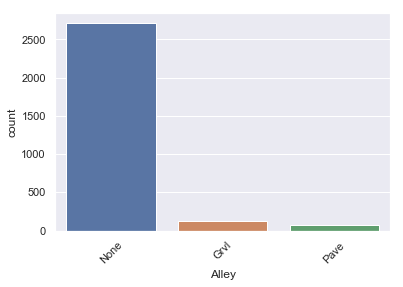

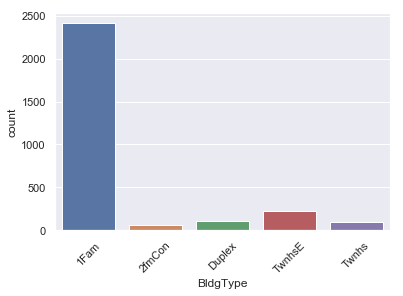

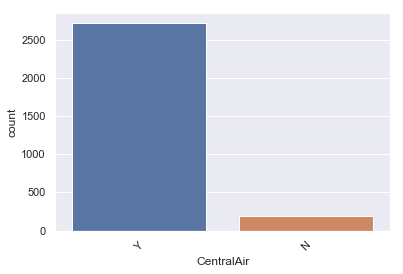

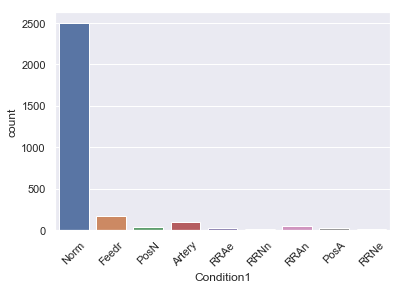

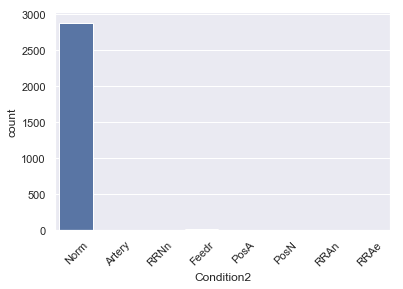

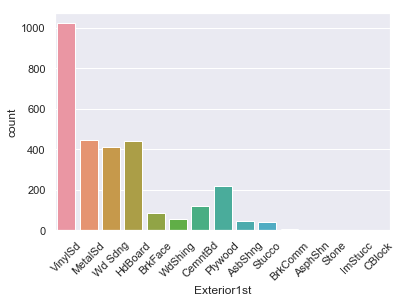

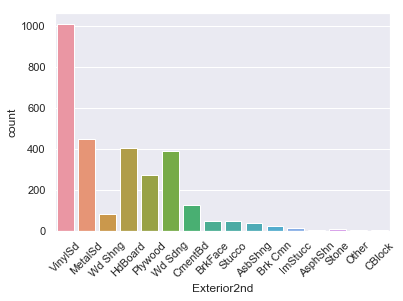

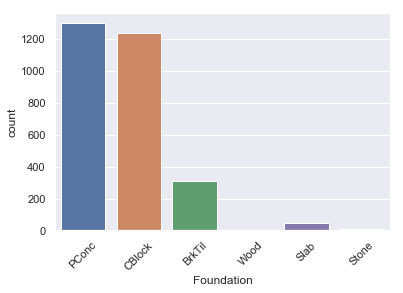

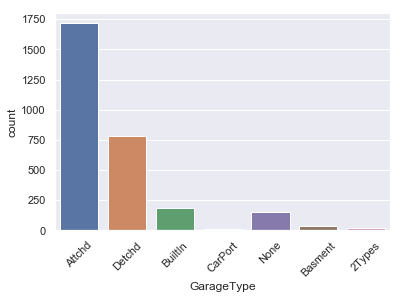

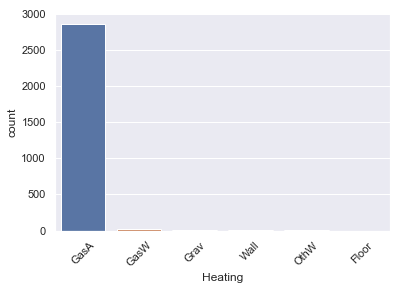

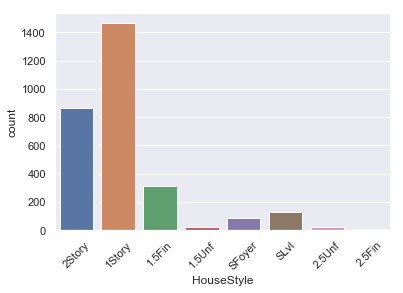

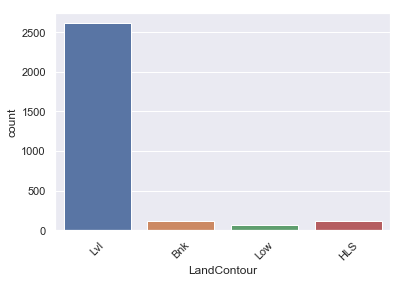

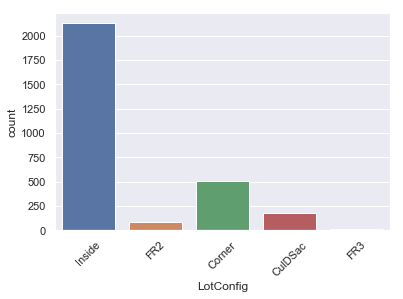

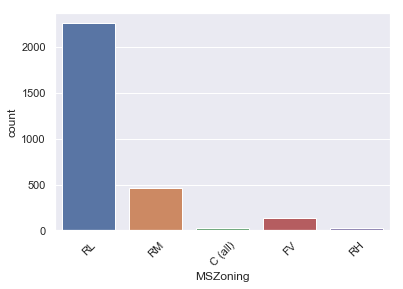

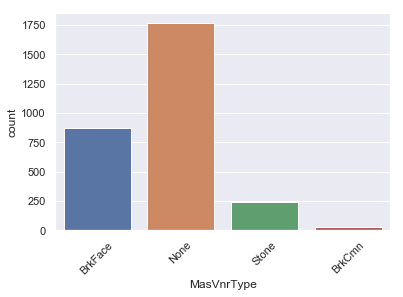

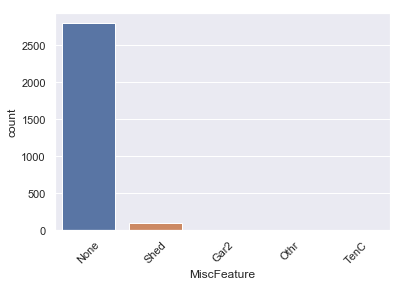

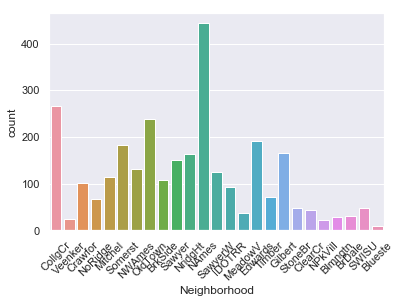

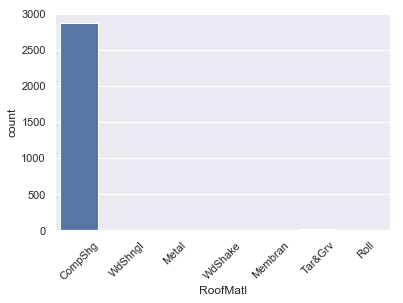

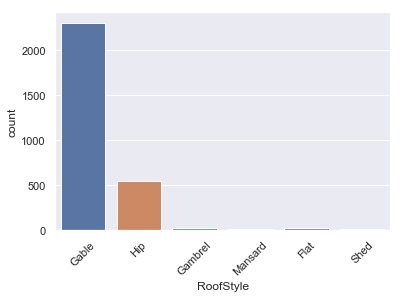

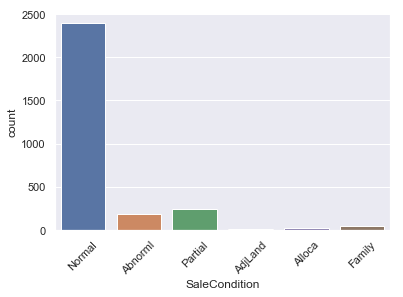

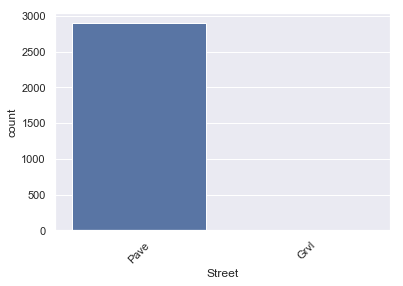

In [564]:
# sns.countplot on the Nominal Categorical Values to visualize
for i, col in enumerate(all_data.select_dtypes(['object']).columns):
    plt.figure(i)
    sns.countplot(x=col, data=all_data)
    plt.xticks(rotation=45)
    plt.show() 

In [45]:
train_df.groupby('LandContour')['SalePrice'].mean()

LandContour
Bnk   142144.377
HLS   218174.404
Low   203661.111
Lvl   177752.854
Name: SalePrice, dtype: float64

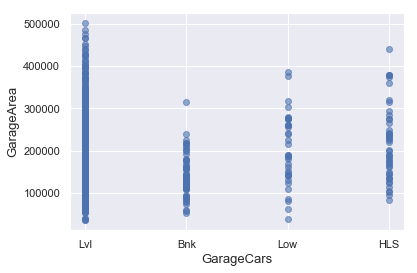

In [46]:
# There are outliers present in the training data
# GrLivArea: Above grade (ground) living area square feet
fig, ax = plt.subplots()
ax.scatter(x = train_df['LandContour'], y = train_df['SalePrice'], alpha = 0.6)
plt.ylabel('GarageArea', fontsize = 13)
plt.xlabel('GarageCars', fontsize = 13)
plt.show()

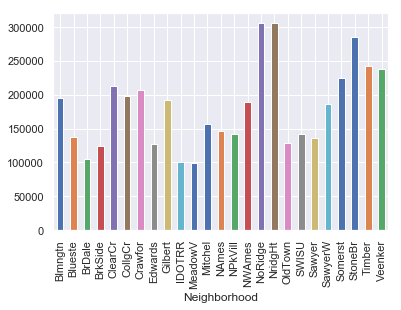

In [47]:
#investigate mean sales price/neighborhood 

train_df.groupby('Neighborhood')['SalePrice'].agg('mean').plot('bar')

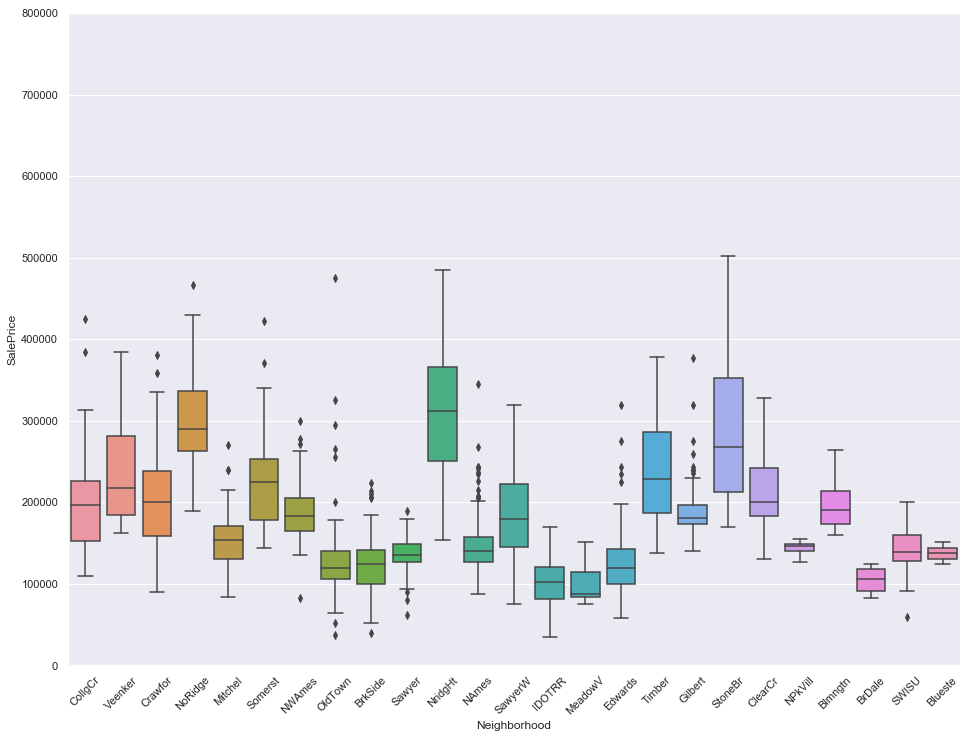

In [48]:
#neighborhood sale price ranges boxplot 

f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train_df) 
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45)
plt.show()

### Dropping Nominal Categorical Variables that may have misrepresentation

In [316]:
# DO NOT DROP IN THIS VERSION


#all_data.drop(['BldgType','LotConfig', 'LandContour', 'MSSubClass','MSZoning','RoofStyle','SaleCondition'],axis=1,inplace=True)  

# Drop Some EXTRA Nominal

In [570]:
#Made CHange 5/26/2019
all_data.drop(['Condition2','Heating','RoofMatl','Street'],axis=1,inplace=True)

### Sanity check to ensure correct number of features is dropped 

In [572]:

all_data.shape

(2907, 75)

### Sum of NA values in all_data dataframe (should be 0)

In [573]:

sum(all_data.isnull().sum()) 

0

### Write all_data to csv pre-dummification (for tree-based models) 

In [574]:
all_data.to_csv('data/csv_versions/version5/all_data_no_dummies.csv', index = False)  

### Save train_y to csv: 

In [575]:
#y_train = pd.DataFrame(y_train) 

In [576]:
#y_train.to_csv('data/y_train.csv', index = False)

## Dummify remaining nominal categorical variables 

In [577]:
all_data_d = pd.get_dummies(all_data)  

In [578]:
all_data_d.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,Electrical,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,Num_Bathrooms,ExtStructSF,HouseSF,YearRemodAgg,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,856,854,0,3,4,3,706.000,0.000,2,6,1.000,0.000,2,150.000,4,0,4,2,4,3,0,2,6,548.000,2.000,5,2,5,2003.000,1710,1,0,1,2,0,8450,65.000,3,0,60,196.000,0,2,61,4,6,2,0,3,0,8,856.000,0,2008,3.500,61,3114.000,2003.000,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1262,0,0,3,4,1,978.000,0.000,0,6,0.000,1.000,2,284.000,4,0,4,3,4,5,1,2,6,460.000,2.000,5,2,5,1976.000,1262,0,0,1,3,0,9600,80.000,3,0,20,0.000,0,5,0,7,5,2,0,3,0,6,1262.000,298,2007,2.500,298,2984.000,1976.000,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,920,866,0,3,4,2,486.000,0.000,2,6,1.000,0.000,2,434.000,4

# Visualizations on Engineered Features

Saving figure YearRemodAdd_SalePrice


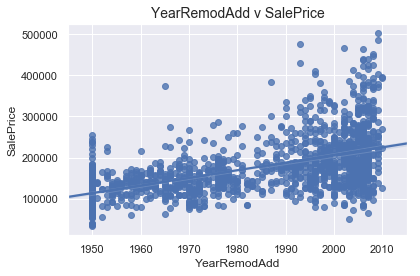

In [579]:
ax = sns.regplot(x=temp['YearRemodAdd'], y=temp['SalePrice'])
ax.set_title('YearRemodAdd v SalePrice',fontsize=14)

save_fig('YearRemodAdd_SalePrice')  

Saving figure YearBuilt_SalePrice


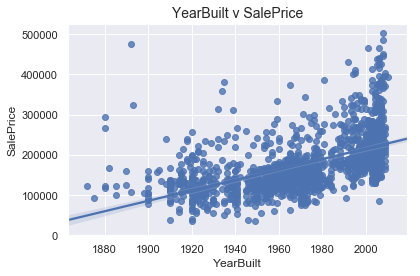

In [580]:
ax = sns.regplot(x=temp['YearBuilt'], y=temp['SalePrice'])
ax.set_title('YearBuilt v SalePrice',fontsize=14)

save_fig('YearBuilt_SalePrice')  

Saving figure YearRemodAgg_SalePrice


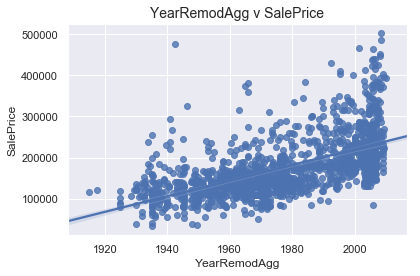

In [581]:


# Create YearRemodAgg column to depcit better estimate between YearBuilt and YearRemodAdd
temp['mean_year'] = temp[['YearBuilt', 'YearRemodAdd']].mean(axis=1)
temp['YearRemodAgg']=temp[['YearBuilt', 'mean_year']].max(axis=1)   
# Drop 'mean_year','YearBuilt','YearRemodAdd': Since we have made a new YearRemodAgg Column


import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=temp['YearRemodAgg'], y=temp['SalePrice'])
ax.set_title('YearRemodAgg v SalePrice',fontsize=14)

save_fig('YearRemodAgg_SalePrice')  

# PCA

In [582]:
all_data_d.shape

(2907, 189)

In [583]:
all_data_pca = all_data_d.copy()

In [584]:
all_data_pca = all_data_pca.drop(all_data_pca.columns[58:213].values,axis=1)

In [585]:
from sklearn.decomposition import PCA
pca = PCA()

In [586]:
213-58

155

In [326]:
data = all_data_d.iloc[:,58:213]

Saving figure Percentage_Variance_PCA


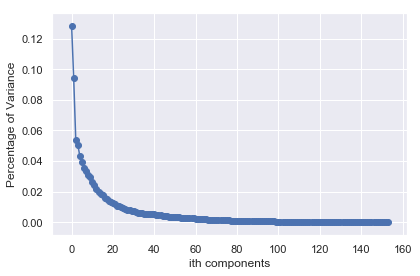

In [538]:
pca.set_params(n_components=None)
pca.fit(data)
plt.plot(range(154), pca.explained_variance_ratio_)
plt.scatter(range(154), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')

save_fig('Percentage_Variance_PCA') 

In [223]:
#### Your code here
pca.set_params(n_components=80).fit(data)
pca_n_c = pca.transform(data)

In [224]:
pca.explained_variance_ratio_.sum()

0.9811884371084332

In [225]:
pca_n_c

array([[-1.59961533e+00, -3.62229761e-01,  6.98067383e-01, ...,
        -1.39329772e-02,  1.90019254e-02, -1.97051522e-04],
       [ 7.11291682e-01,  6.61195394e-01, -4.95829698e-01, ...,
         8.26148810e-03,  5.22497790e-01, -1.00945789e-01],
       [-1.59961533e+00, -3.62229761e-01,  6.98067383e-01, ...,
        -1.39329772e-02,  1.90019254e-02, -1.97051522e-04],
       ...,
       [ 1.38247806e-01, -2.21904738e-01, -9.49051757e-01, ...,
        -5.22291734e-02,  4.20500093e-02,  1.89158099e-02],
       [ 1.75940901e-01, -2.62369298e-01,  1.32976066e-01, ...,
         7.67082545e-02, -4.64001903e-02, -5.90376514e-02],
       [-6.65817750e-01,  4.05267485e-01,  1.48600989e+00, ...,
        -9.46275742e-02,  7.82237263e-02,  2.05730372e-02]])

In [226]:
all_data_pca = pd.concat([all_data_pca, pd.DataFrame(pca_n_c)],axis=1)

In [227]:
all_data_pca.shape

(2907, 138)

### save PCA

In [228]:
all_data_pca.to_csv('data/csv_versions/version5/all_data_pca.csv', index = False)  

In [ ]:
#check dimensions of dummified df 

all_data_d.shape

## Write modified dataframe to CSV: 

In [185]:
all_data_d.to_csv('data/csv_versions/version5/all_data.csv', index = False)  

### Different MODELING

## Testing if fixing Skewed Features Help

In [465]:
# numeric_features = all_data_d.select_dtypes(exclude = "object").columns.tolist()
# skewed_features = all_data_d[numeric_features].apply(lambda x: skew(x.dropna()))
# skewed_features = skewed_features[skewed_features > 0.75].index # WHY 0.75?

# all_data_d[skewed_features] = np.log1p(all_data_d[skewed_features])


### and it has minimal effect on scores

In [587]:
X = all_data_d[:rntrain]
test = all_data_d[rntrain:]
y = np.log1p(y_train)

In [588]:
X.shape

(1448, 189)

In [589]:
test.shape

(1459, 189)

In [590]:
scoring = 'neg_mean_squared_error'

In [591]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

In [592]:
#testing various regression algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('RIDGECV', RidgeCV()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

In [593]:
results = []
names = []
m, model_name = float('-inf'), ''
for name, model in models:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:', cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: LR 	Mean: -125983.36758085672 	Std: 31801.379751125256
Model: LASSO 	Mean: -0.02743809266170714 	Std: 0.0015281771338012539
Model: RIDGE 	Mean: -0.014424621177885455 	Std: 0.0018320043624117778
Model: RIDGECV 	Mean: -0.01375623142396236 	Std: 0.0016984741030600025
Model: EN 	Mean: -0.02532307056933487 	Std: 0.0010324564664361561
Model: CART 	Mean: -0.03831018770624444 	Std: 0.003881895526845756
Model: KNN 	Mean: -0.046052492064337536 	Std: 0.0023998505568547887
Model: SVR 	Mean: -0.15013065659376235 	Std: 0.009716399654911804

Best model: 	RIDGECV


In [594]:

#testing various regression algorithms with the feature scaling
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', RobustScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', RobustScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', RobustScaler()), ('RIDGE', Ridge())])))
pipelines.append(('ScaledRIDGECV', Pipeline([('Scaler', RobustScaler()), ('RIDGECV', RidgeCV())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', RobustScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', RobustScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', RobustScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', RobustScaler()), ('SVR', SVR())])))

In [595]:
results = []
names = []
m, model_name = float('-inf'), ''
for name, model in pipelines:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:',cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: ScaledLR 	Mean: -0.015738645081254304 	Std: 0.0022137773100089925
Model: ScaledLASSO 	Mean: -0.13819819907484207 	Std: 0.00991094596498743
Model: ScaledRIDGE 	Mean: -0.014409451087729877 	Std: 0.001838898295975928
Model: ScaledRIDGECV 	Mean: -0.013670535261291217 	Std: 0.0017799415577784336
Model: ScaledEN 	Mean: -0.13130011184295937 	Std: 0.008788295493524691
Model: ScaledCART 	Mean: -0.03951608470802511 	Std: 0.0026090261004594623
Model: ScaledKNN 	Mean: -0.0591180793003546 	Std: 0.004799172891224983
Model: ScaledSVR 	Mean: -0.04511735339903797 	Std: 0.006495586293982821

Best model: 	ScaledRIDGECV


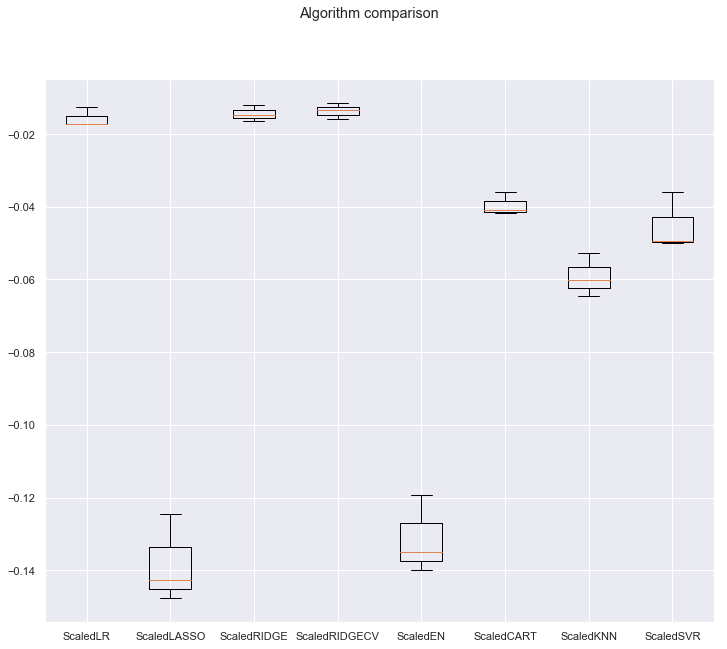

In [596]:
#Plot of the statistical distribution of the chosen algorithms
fig = plt.figure(figsize = (12, 10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [597]:
#RidgeCV tuning (finding the best alphas parameter)
alpha_values = []
value = 28.0
while value <= 30.0:
    alpha_values.append([value])
    value += 0.1
param_grid = dict(alphas = alpha_values)
kfold = KFold()
grid = GridSearchCV(estimator = RidgeCV(), param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X, y)

In [598]:
print('Best score: %f using %s\n' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))
    
best_alpha = grid_result.best_params_['alphas']

Best score: -0.013812 using {'alphas': [28.0]}

-0.013812 (0.001703) with: {'alphas': [28.0]}
-0.013812 (0.001703) with: {'alphas': [28.1]}
-0.013813 (0.001703) with: {'alphas': [28.200000000000003]}
-0.013814 (0.001703) with: {'alphas': [28.300000000000004]}
-0.013814 (0.001703) with: {'alphas': [28.400000000000006]}
-0.013815 (0.001703) with: {'alphas': [28.500000000000007]}
-0.013815 (0.001703) with: {'alphas': [28.60000000000001]}
-0.013816 (0.001703) with: {'alphas': [28.70000000000001]}
-0.013817 (0.001703) with: {'alphas': [28.80000000000001]}
-0.013817 (0.001703) with: {'alphas': [28.900000000000013]}
-0.013818 (0.001703) with: {'alphas': [29.000000000000014]}
-0.013819 (0.001703) with: {'alphas': [29.100000000000016]}
-0.013819 (0.001703) with: {'alphas': [29.200000000000017]}
-0.013820 (0.001703) with: {'alphas': [29.30000000000002]}
-0.013821 (0.001703) with: {'alphas': [29.40000000000002]}
-0.013821 (0.001703) with: {'alphas': [29.50000000000002]}
-0.013822 (0.001703) with:

In [599]:
#testing various boosting algorithms
models = []
models.append(('AB', AdaBoostRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))

In [600]:

results = []
names = []
m, model_name = float('-inf'), ''
for name, model in models:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:',cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: AB 	Mean: -0.026825753190507628 	Std: 0.0026775421688728764
Model: GBM 	Mean: -0.01462822387858232 	Std: 0.002144766136916231
Model: RF 	Mean: -0.02114782998878345 	Std: 0.0014387472588709644
Model: ET 	Mean: -0.020021954941685873 	Std: 0.0018664402733773449

Best model: 	GBM


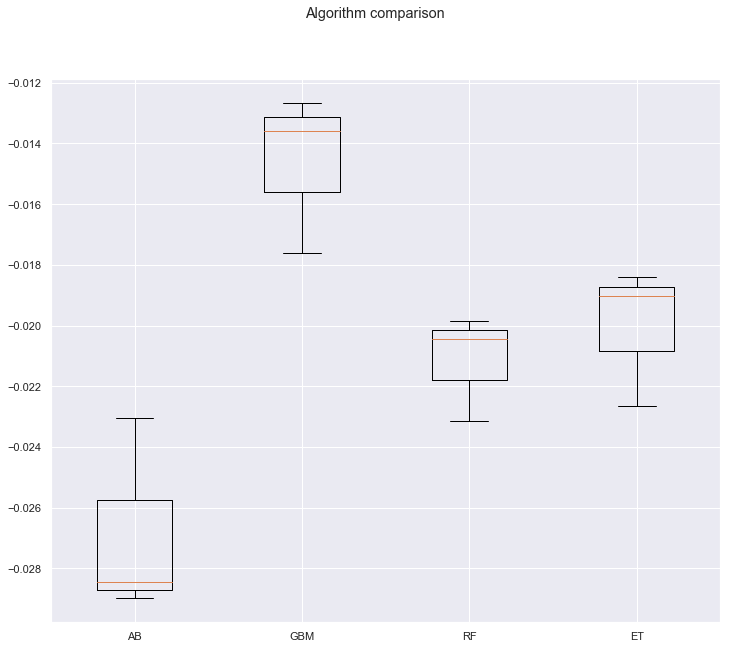

In [601]:

#Plot of the statistical distribution of the chosen algorithms
fig = plt.figure(figsize = (12, 10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [602]:
#testing various boosting algorithms with the feature scaling
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', RobustScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', RobustScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', RobustScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', RobustScaler()),('ET', ExtraTreesRegressor())])))

In [603]:
results = []
names = []
m, model_name = float('-inf'), ''
for name, model in ensembles:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:',cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: ScaledAB 	Mean: -0.02714487217753314 	Std: 0.0022083864727986883
Model: ScaledGBM 	Mean: -0.014741026049273506 	Std: 0.0021722344800084283
Model: ScaledRF 	Mean: -0.021132113409365206 	Std: 0.0024068969185392997
Model: ScaledET 	Mean: -0.019035194663098484 	Std: 0.001834440798696823

Best model: 	ScaledGBM


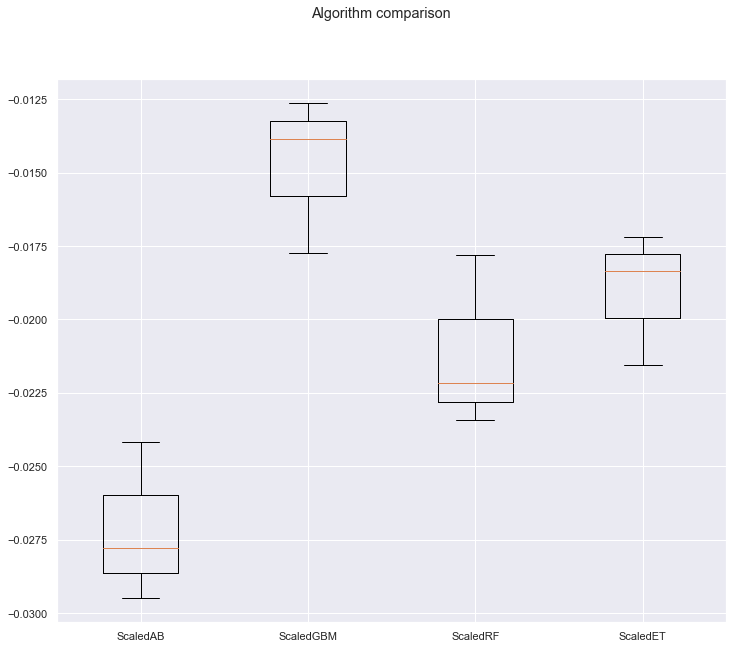

In [604]:
#Plot of the statistical distribution of the chosen algorithms
fig = plt.figure(figsize = (12, 10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [605]:

#GBM tuning (finding the best n_estimators parameter)
#param_grid = dict(n_estimators = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
#param_grid = dict(n_estimators = np.array([350, 360, 370, 380, 390, 400]))
param_grid = dict(n_estimators = np.array([370, 375, 380, 385, 390, 395, 400, 405, 410, 415]))
model = GradientBoostingRegressor()
kfold = KFold()
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X, y)

In [606]:
print('Best score: %f using %s\n' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))
    
best_n_estimators = grid_result.best_params_['n_estimators']

Best score: -0.014173 using {'n_estimators': 415}

-0.014175 (0.001986) with: {'n_estimators': 370}
-0.014282 (0.002098) with: {'n_estimators': 375}
-0.014329 (0.002091) with: {'n_estimators': 380}
-0.014226 (0.002231) with: {'n_estimators': 385}
-0.014231 (0.002220) with: {'n_estimators': 390}
-0.014352 (0.002151) with: {'n_estimators': 395}
-0.014271 (0.002033) with: {'n_estimators': 400}
-0.014357 (0.002137) with: {'n_estimators': 405}
-0.014276 (0.002053) with: {'n_estimators': 410}
-0.014173 (0.001950) with: {'n_estimators': 415}


In [607]:

#ensembling RidgeCV (80%) and Gradient Boosting (20%) without feature scaling
print('Predicting house prices with:\n')
print('RidgeCV(alphas = ' + str(best_alpha) + ')')
print('GradientBoostingRegressor(n_estimators = '+ str(best_n_estimators) + ')')

ridge_cv = RidgeCV(alphas = best_alpha)
ridge_cv_predictions = ridge_cv.fit(X, y).predict(test)

gbm = GradientBoostingRegressor(n_estimators = best_n_estimators)
gbm_predictions = gbm.fit(X, y).predict(test)

predictions = np.expm1(ridge_cv_predictions) * 0.8 + np.expm1(gbm_predictions) * 0.2

Predicting house prices with:

RidgeCV(alphas = [28.0])
GradientBoostingRegressor(n_estimators = 415)


In [608]:
submission = pd.DataFrame()
submission['Id'] = test_Id
submission['SalePrice'] = predictions
submission.to_csv('submission.csv', index = False)